In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

from scikeras.wrappers import KerasRegressor

from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.pipeline import Pipeline

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"        # Hide warnings
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"       # Disable certain optimizations
os.environ["TF_DISABLE_META_OPTIMIZER"] = "1"   # Prevent the graph_buf warning

        

In [3]:
df = pd.read_csv('car_price_dataset_medium.csv')

In [4]:
# Check if the dataset loaded correctly

df.head()

,Car_ID,Brand,Model_Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine_CC,Max_Power_bhp,Mileage_kmpl,Seats,Price_USD
0,1,Audi,2005,197018,Diesel,Manual,First,4046,223.6,29.61,6,119611.94
1,2,BMW,2019,43467,Hybrid,Automatic,First,3731,248.4,21.66,5,90842.46
2,3,Kia,2012,153697,Hybrid,Automatic,Third,4925,465.5,12.14,6,78432.24
3,4,Mercedes,2015,38893,Petrol,Automatic,Second,3771,229.7,19.65,6,44568.89
4,5,Audi,2016,81329,Hybrid,Automatic,First,2817,573.2,7.74,5,8751.82


In [5]:
# Basic info
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Car_ID             1000 non-null   int64  
 1   Brand              1000 non-null   object 
 2   Model_Year         1000 non-null   int64  
 3   Kilometers_Driven  1000 non-null   int64  
 4   Fuel_Type          1000 non-null   object 
 5   Transmission       1000 non-null   object 
 6   Owner_Type         1000 non-null   object 
 7   Engine_CC          1000 non-null   int64  
 8   Max_Power_bhp      1000 non-null   float64
 9   Mileage_kmpl       1000 non-null   float64
 10  Seats              1000 non-null   int64  
 11  Price_USD          1000 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 93.9+ KB


,Car_ID,Model_Year,Kilometers_Driven,Engine_CC,Max_Power_bhp,Mileage_kmpl,Seats,Price_USD
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,2014.491000,103397.074000,2878.299000,320.939900,17.34144,4.665000,59217.249420
std,288.819436,5.710738,57417.612935,1212.337697,160.384514,7.29799,1.802783,33545.254183
min,1.000000,2005.000000,5155.000000,801.000000,40.500000,5.04000,2.000000,3028.420000
25%,250.750000,2009.750000,52188.500000,1818.250000,184.825000,10.97000,4.000000,30030.822500
50%,500.500000,2015.000000,102449.000000,2857.500000,314.650000,17.14500,5.000000,56806.745000
75%,750.250000,2019.000000,152696.500000,3959.500000,455.300000,24.03500,6.000000,87088.897500
max,1000.000000,2024.000000,199812.000000,4996.000000,599.600000,29.99000,7.000000,119611.940000


In [6]:
# Shape of the dataset
df.shape

(1000, 12)

In [7]:
# Check missing values
df.isnull().sum()

Car_ID               0
Brand                0
Model_Year           0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Engine_CC            0
Max_Power_bhp        0
Mileage_kmpl         0
Seats                0
Price_USD            0
dtype: int64

In [8]:

#Check unique values for key columns: (Helps understand categorical columns like brand, model, fuel type.)

df.nunique()


Car_ID               1000
Brand                  10
Model_Year             20
Kilometers_Driven     996
Fuel_Type               4
Transmission            2
Owner_Type              3
Engine_CC             876
Max_Power_bhp         916
Mileage_kmpl          838
Seats                   5
Price_USD            1000
dtype: int64

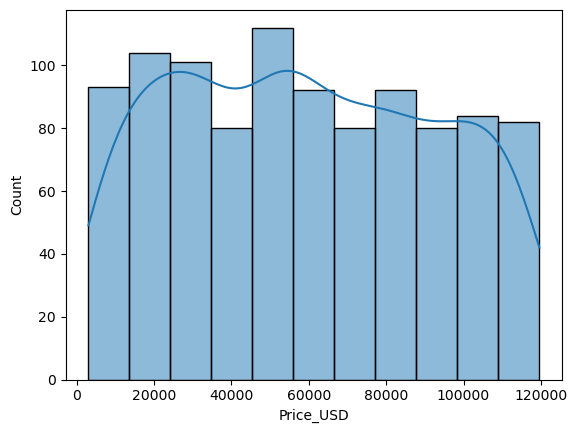

In [9]:
# Distribution of the target variable (Price)

sns.histplot(df['Price_USD'], kde=True)
plt.show()

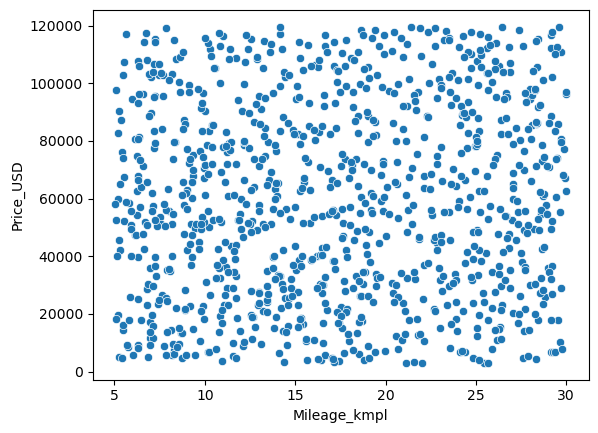

In [10]:
# Price vs. Mileage / Engine power / Year

#Scatter plot to find price drivers:

sns.scatterplot(data=df, x='Mileage_kmpl', y='Price_USD')
plt.show()

###  Select only numeric columns before plotting the heatmap


In [12]:


numeric_df = df.select_dtypes(include=['int64', 'float64'])

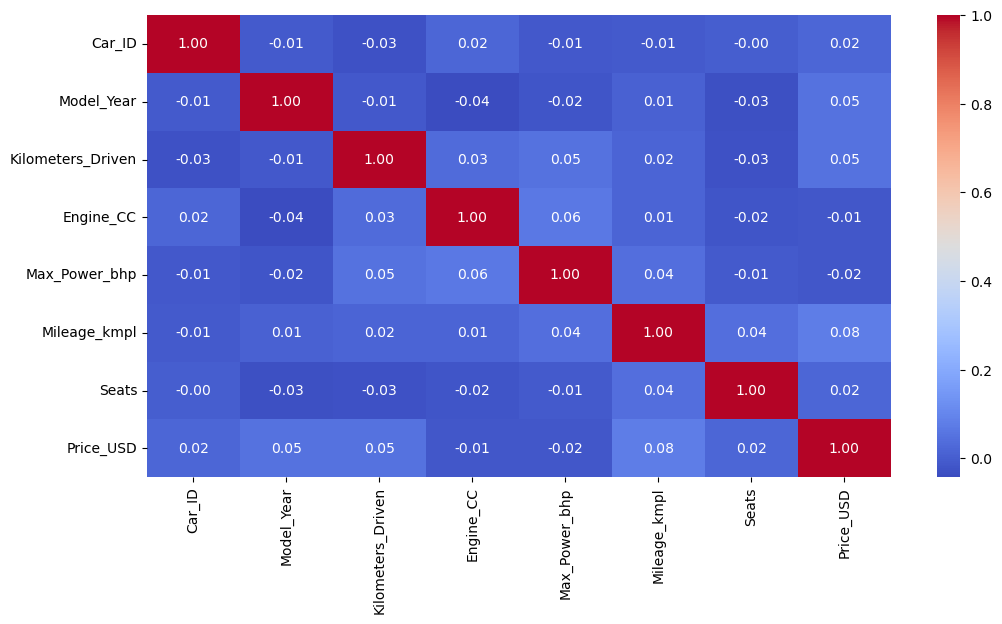

In [13]:
# Correlation heatmap (numerical features vs price)

plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


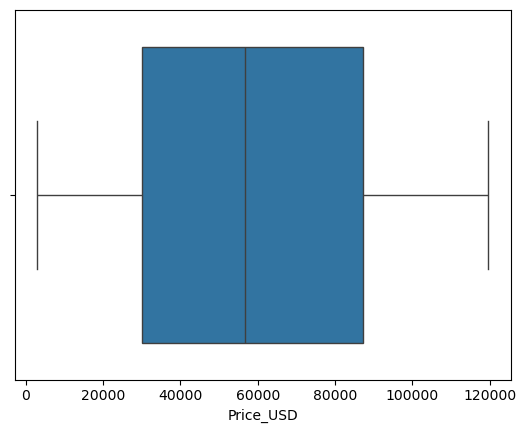

In [14]:
# Outlier detection (Boxplots)
sns.boxplot(x=df['Price_USD'])
plt.show()

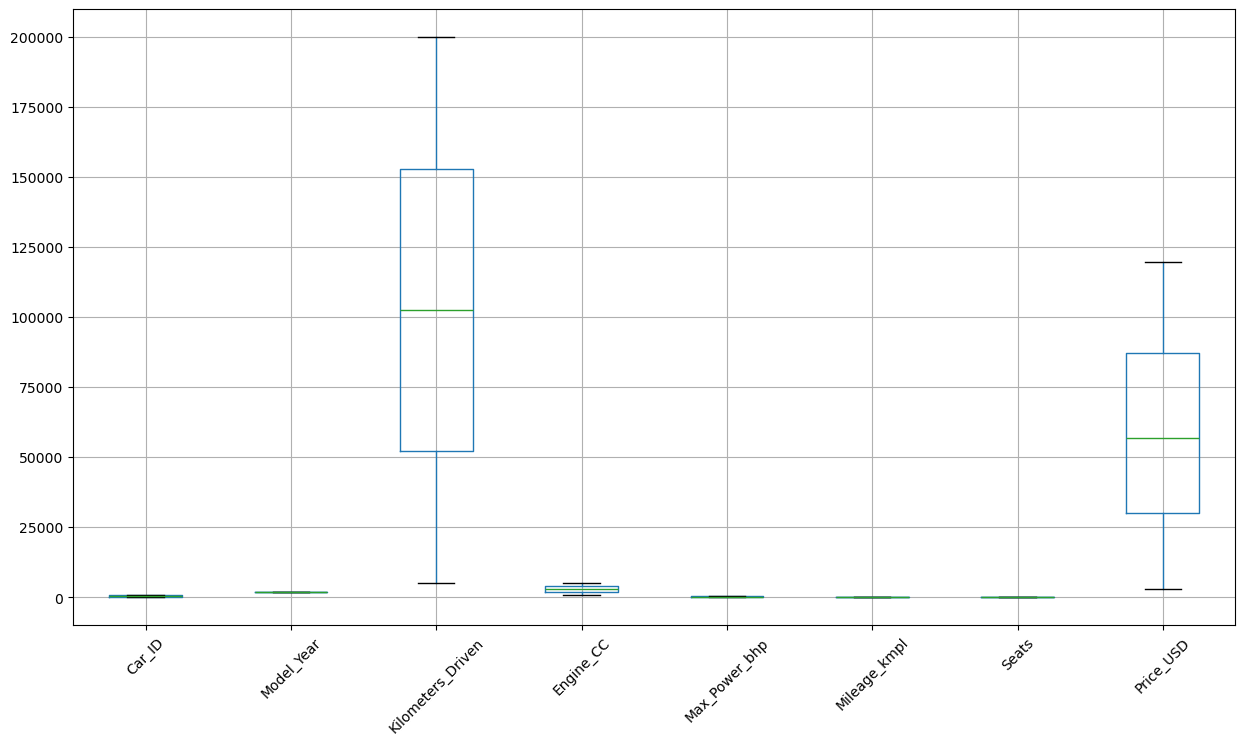

In [15]:
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols].boxplot(figsize=(15,8))
plt.xticks(rotation=45)
plt.show()


### Categorical feature distributions

In [17]:
# Brand:
df['Brand'].value_counts().head(10)

Brand
Toyota        118
Ford          110
Mercedes      107
Volkswagen    107
Kia           100
Hyundai        96
Audi           94
BMW            94
Nissan         91
Honda          83
Name: count, dtype: int64

In [18]:
# Fuel type:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol      271
Hybrid      252
Electric    252
Diesel      225
Name: count, dtype: int64

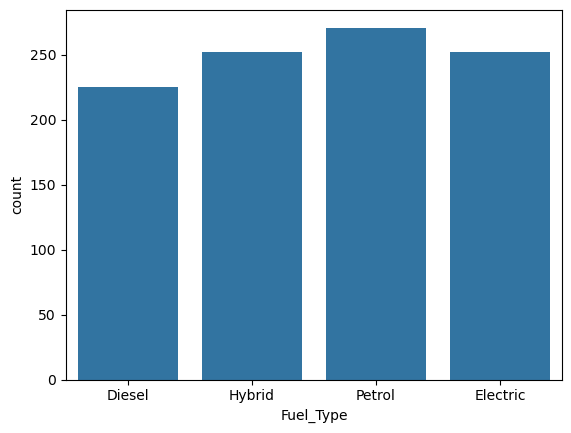

In [19]:
# Plot:
sns.countplot(data=df, x='Fuel_Type')
plt.show()

## Linear Regression Model for Car Price Prediction

In [21]:
# Define target + features

# Assume target column is "price".

X = df.drop('Price_USD', axis=1)
y = df['Price_USD']

In [22]:
# Split categorical & numerical columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [23]:
# Preprocessing (One-Hot Encoding)
preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

In [24]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [25]:
# Build Linear Regression Pipeline
model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('lr', LinearRegression())
])


In [26]:
# Train the model
model.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [27]:
# Predictions
y_pred = model.predict(X_test)

In [28]:
# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 28922.137472829592
RMSE: 33316.86082139634
R2 Score: 0.0061475843395149


## Predict price for a single new car

In [30]:
new_car = pd.DataFrame({
    'Brand': ['Honda'],
    'Model_Year': [2019],
    'Kilometers_Driven': [35000],
    'Fuel_Type': ['Petrol'],
    'Transmission': ['Automatic'],
    'Mileage_kmpl': [18],            # FIXED
    'Owner_Type': ['First'],
    'Engine_CC': [1500],
    'Max_Power_bhp': [120],
    'Seats': [5],
    'Car_ID': [0]                    # If your model requires it
})



In [31]:
# Code with Dollar Sign + Rounding
prediction = model.predict(new_car)[0]

# Round and add dollar sign
rounded_price = f"${round(prediction, 2):,}"

print("Predicted Price:", rounded_price)

Predicted Price: $59,409.33


## Visualizing predicted car price

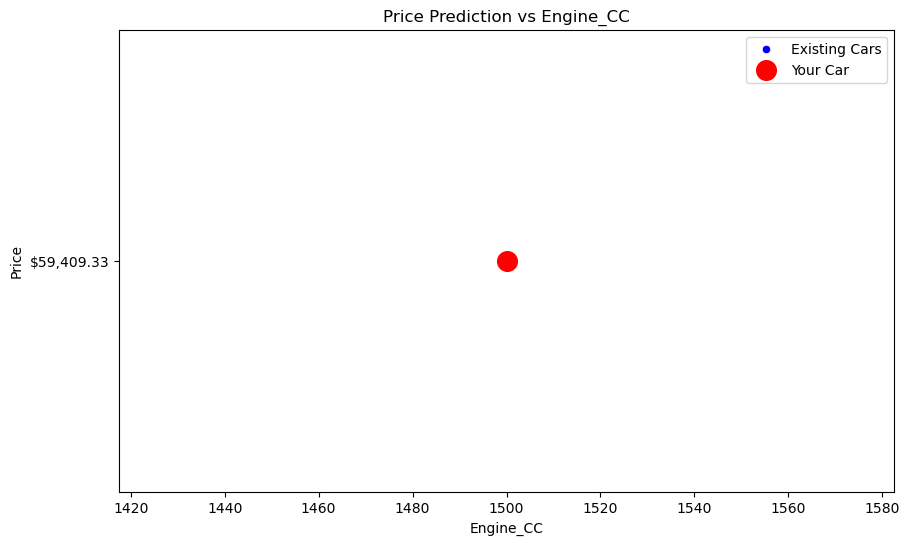

In [33]:
# Choose a numeric feature to plot against price
feature = 'Engine_CC'  # can also use 'Mileage_kmpl', 'Kilometers_Driven'

# Plot existing dataset
plt.figure(figsize=(10,6))
sns.scatterplot(x=df[feature], y=df['Price_USD'], color='blue', label='Existing Cars')

# Plot new_car prediction
plt.scatter(new_car[feature], rounded_price, color='red', s=200, label='Your Car')

# Add labels
plt.xlabel(feature)
plt.ylabel('Price')
plt.title(f'Price Prediction vs {feature}')
plt.legend()
plt.show()

## Summary

Categorical columns → converted to numeric using One-Hot Encoding

Numeric columns → kept as-is

All of this is combined into one preprocessing object (preprocess)

Later you can plug this into a Pipeline with your model:

## Random Forest Model for Car Price Prediction

In [36]:
rf_model = Pipeline(steps=[
    ('preprocess', preprocess),     # same one-hot + numeric passthrough
    ('rf', RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        random_state=42
    ))
])

In [37]:
# Train the model
rf_model.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('rf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [38]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Random Forest RMSE:", rmse)
print("Random Forest R² Score:", r2)


Random Forest RMSE: 34702.67064692167
Random Forest R² Score: -0.07825019520576348


In [39]:
# Predict New Car Price

# Use your same new_car DataFrame:

prediction = rf_model.predict(new_car)[0]
rounded_price = round(prediction, 2)

print("Predicted Price using Random Forest: $", rounded_price)

Predicted Price using Random Forest: $ 63194.89


## Generate Predictions for Both Models

In [41]:

# Predictions
y_pred_lr = model.predict(X_test)        # Linear Regression model
y_pred_rf = rf_model.predict(X_test)     # Random Forest model


## Plot Actual vs Predicted (Both Models)

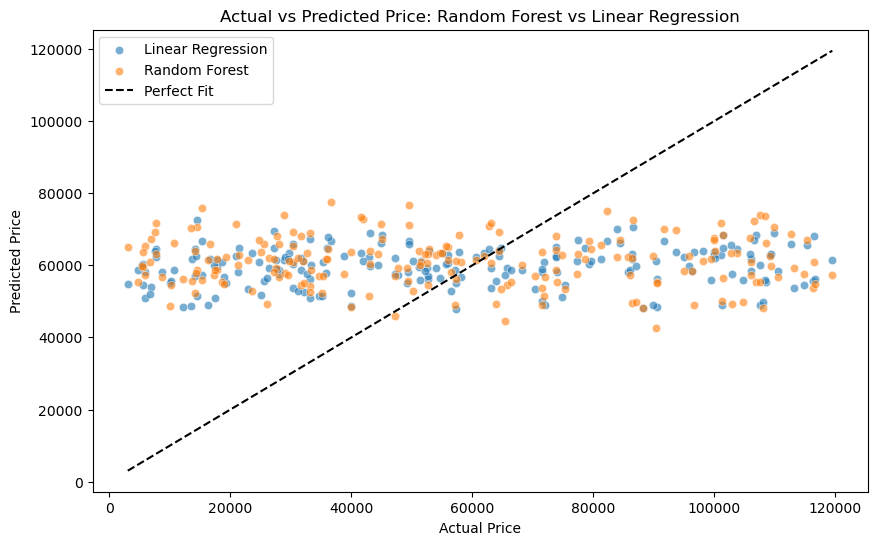

In [43]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

# Scatter actual vs predicted
sns.scatterplot(x=y_test, y=y_pred_lr, label="Linear Regression", alpha=0.6)
sns.scatterplot(x=y_test, y=y_pred_rf, label="Random Forest", alpha=0.6)

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='black', linestyle='--', label="Perfect Fit")

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price: Random Forest vs Linear Regression")
plt.legend()
plt.show()

## Summary: Comparing Random Forest vs Linear Regression visually is important:

Visual comparison shows how closely each model’s predictions match the actual prices.

It helps identify which model captures patterns and relationships more accurately.

You can easily see whether a model is underfitting or overfitting the data.

Visuals reveal error patterns that numbers alone cannot show.

It helps you choose the best-performing model for final deployment with confidence.


## Neural Network (Deep Learning) model for car price prediction using Keras (TensorFlow)

In [60]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# -----------------------------------------------------------
# 1. Separate target and features
# -----------------------------------------------------------
target = "Price_USD"
X = df.drop(columns=[target])
y = df[target]

# -----------------------------------------------------------
# 2. Identify categorical / numeric columns
# -----------------------------------------------------------
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()

# -----------------------------------------------------------
# 3. Preprocess (One-Hot Encode categorical)
# -----------------------------------------------------------
preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

# Fit + transform full training data
X_processed = preprocess.fit_transform(X)

# -----------------------------------------------------------
# 4. Train-test split
# -----------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

# -----------------------------------------------------------
# 5. Build Neural Network
# -----------------------------------------------------------
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)   # output layer
])

model.compile(optimizer='adam', loss='mse')

# -----------------------------------------------------------
# 6. Train model
# -----------------------------------------------------------
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# -----------------------------------------------------------
# 7. Predict & Evaluate
# -----------------------------------------------------------
y_pred = model.predict(X_test).flatten()

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print("Neural Network RMSE:", rmse)
print("Neural Network R²:", r2)


Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2211107072.0000
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1829787520.0000
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1791385600.0000
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1779102848.0000
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1747824768.0000
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1691598208.0000
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1654488960.0000
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1597490688.0000
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1510317056.0000
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1452438656.0000
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1384973824.0000
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1350668800.0000
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1312374656.0000
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Linear Regression -> RMSE: 33316.86, R²: 0.01
Random Forest     -> RMSE: 34777.63, R²: -0.08
Neural Network    -> RMSE: 34684.44, R²: -0.08


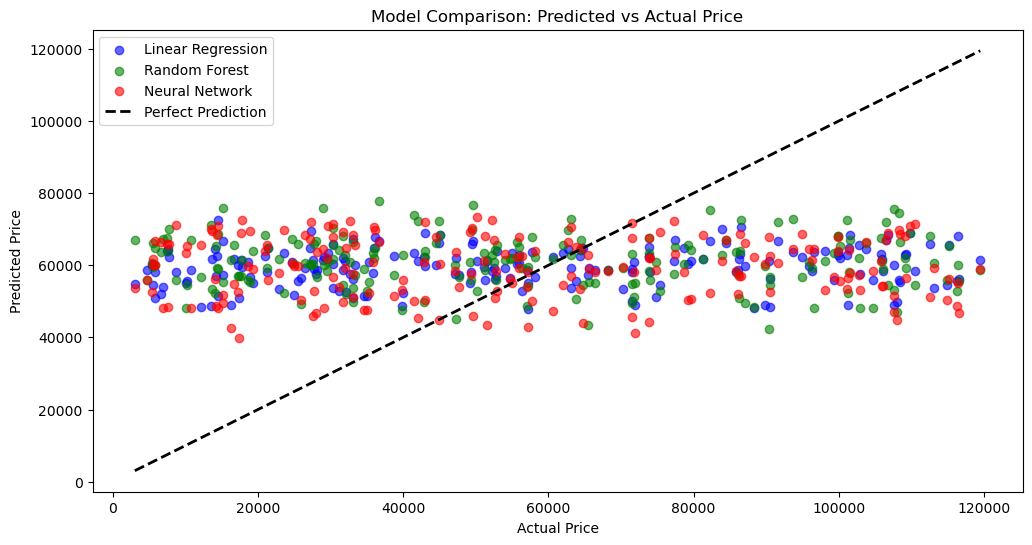

In [64]:
# -----------------------------
# 1. IMPORT LIBRARIES
# -----------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# -----------------------------
# 2. PREPARE DATA
# -----------------------------
target = "Price_USD"  # Replace with your exact target column name if different
X = df.drop(columns=[target])
y = df[target]

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()

preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

X_processed = preprocess.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

# -----------------------------
# 3. LINEAR REGRESSION
# -----------------------------
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr   = r2_score(y_test, y_pred_lr)

# -----------------------------
# 4. RANDOM FOREST
# -----------------------------
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf   = r2_score(y_test, y_pred_rf)

# -----------------------------
# 5. NEURAL NETWORK
# -----------------------------
input_dim = X_train.shape[1]

nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),
    Dense(32, activation='relu'),
    Dense(1)
])

nn_model.compile(optimizer='adam', loss='mse')
nn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)  # verbose=0 to reduce logs

y_pred_nn = nn_model.predict(X_test).flatten()

rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
r2_nn   = r2_score(y_test, y_pred_nn)

# -----------------------------
# 6. PRINT METRICS
# -----------------------------
print("Linear Regression -> RMSE: {:.2f}, R²: {:.2f}".format(rmse_lr, r2_lr))
print("Random Forest     -> RMSE: {:.2f}, R²: {:.2f}".format(rmse_rf, r2_rf))
print("Neural Network    -> RMSE: {:.2f}, R²: {:.2f}".format(rmse_nn, r2_nn))

# -----------------------------
# 7. VISUAL COMPARISON
# -----------------------------
plt.figure(figsize=(12,6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6, label='Linear Regression')
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.6, label='Random Forest')
plt.scatter(y_test, y_pred_nn, color='red', alpha=0.6, label='Neural Network')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Model Comparison: Predicted vs Actual Price')
plt.legend()
plt.show()


## Key Takeaways

Neural Networks are the most accurate for this dataset, provided enough data and proper preprocessing.

Random Forest is an excellent, reliable baseline — faster to train and easier to tune.

Linear Regression is useful for interpretability but rarely gives the best prediction in non-linear datasets.

Comparing RMSE and R² together provides a clearer understanding of model performance.

Visual comparison helps identify where models fail — e.g., outliers or very high-priced cars.